In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['bureau_balance.csv', 'application_test.csv', 'installments_payments.csv', 'application_train.csv', 'POS_CASH_balance.csv', 'sample_submission.csv', 'bureau.csv', 'credit_card_balance.csv', 'previous_application.csv']


In [2]:
#reading the data
train_df=pd.read_csv('../input/application_train.csv')
test_df=pd.read_csv('../input/application_test.csv')

In [3]:
print(train_df.shape)
train_df.head()
train_len=len(train_df)

(307511, 122)


In [4]:
print(test_df.shape)
test_df.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

In [6]:
test_df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,...,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,...,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,0.000103,0.014751,0.087477,0.000041,0.088462,0.004493,0.0,0.001169,0.0,0.0,0.0,0.0,0.0,0.0,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,1569.276709,11.462889,0.004529,0.392526,0.403488,0.039971,0.440337,0.369046,0.890423,0.522694,0.515804,3.278172,0.135937,0.228306,0.200673,0.267332,0.417365,0.379299,0.205142,0.181278,0.189498,0.113112,0.081536,0.049318,0.113188,0.082868,0.139164,0.100669,0.147361,0.164976,...,0.100931,0.147629,0.165241,0.082869,0.099737,0.116503,0.048148,0.072998,0.111420,3.608053,0.514413,3.580125,0.403791,878.920740,0.0,0.409698,0.010128,0.120554,0.282536,0.006405,0.283969,0.066879,0.0,0.034176,0.0,0.0,0.0,0.0,0.0,0.0,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,

In [7]:
train_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [8]:
train_df=pd.concat([train_df,test_df])
train_df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,...,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,0.0252,0.0369,0.0369,0.0383,0,1.0,M,0.0143,0.0144,0.0144,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.00,0.00,0.0000,No,0.0690,0.0690,0.0690,0.083037,0.262949,0.139376,1,...,0.0205,0.022,0.0190,0.0193,0.0198,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,0.0000,0.0000,0.0,0.0000,0.00,0.0,2.0,2.0,Laborers,Business Entity Type 3,NaN,0.018801,2,2,0,0,0,0,100002,1.0,0.0149,"Stone, brick",WEDNESDAY,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0959,0.0968,0.0924,0.0529,0.0529,0.0538,0,2.0,F,0.0605,0.0608,0.0497,-16765,-1188,-291,-828.0,-1186.0,0.0,0.0,0.08,0.08,0.0806,No,0.0345,0.0345,0.0345,0.311267,0.622246,NaN,1,...,0.0787,0.079,0.0549,0.0558,0.0554,Cash loans,Higher education,Married,House / apartment,State servant,Family,0.0039,0.0039,0.0,0.0098,0.01,0.0,1.0,1.0,Core staff,School,NaN,0.003541,1,1,0,0,0,0,100003,0.0,0.0714,Block,MONDAY,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,M,NaN,NaN,NaN,-19046,-225,-2531,-815.0,-4260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.555912,0.729567,1,...,NaN,NaN,NaN,NaN,NaN,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Laborers,Government,26.0,0.010032,2,2,0,0,0,0,100004,0.0,NaN,NaN,MONDAY,NaN,NaN,NaN,NaN,NaN,NaN
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,F,NaN,NaN,NaN,-19005,-3039,-2437,-617.0,-9833.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,NaN,1,...,NaN,NaN,NaN,NaN,NaN,Cash loans,Secondary / secondary special,Civil marriage,House / apartment,Working,Unaccompanied,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Laborers,Business Entity Type 3,NaN,0.008019,2,2,0,0,0,0,100006,0.0,NaN,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,M,NaN,NaN,NaN,-19932,-3038,-3458,-1106.0,-4311.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.322738,NaN,1,...,NaN,NaN,NaN,NaN,NaN,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Core staff,Religion,NaN,0.028663,2,2,0,1,0,0,100007,0.0,NaN,NaN,THURSDAY,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train_df.shape

(356255, 122)

In [10]:
#label encoding features with less than 3 categories
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in train_df.columns:
    if train_df[col].dtype=='object' and int(len(train_df[col].value_counts()))<3:
        print(col)
        le.fit(train_df[col].astype(str))
        train_df[col]=le.transform(train_df[col].astype(str))

EMERGENCYSTATE_MODE
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_CONTRACT_TYPE


In [11]:
train_df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,...,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,0.0252,0.0369,0.0369,0.0383,0,1.0,M,0.0143,0.0144,0.0144,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.00,0.00,0.0000,0,0.0690,0.0690,0.0690,0.083037,0.262949,0.139376,1,...,0.0205,0.022,0.0190,0.0193,0.0198,0,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,0.0000,0.0000,0.0,0.0000,0.00,0.0,2.0,2.0,Laborers,Business Entity Type 3,NaN,0.018801,2,2,0,0,0,0,100002,1.0,0.0149,"Stone, brick",WEDNESDAY,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0959,0.0968,0.0924,0.0529,0.0529,0.0538,0,2.0,F,0.0605,0.0608,0.0497,-16765,-1188,-291,-828.0,-1186.0,0.0,0.0,0.08,0.08,0.0806,0,0.0345,0.0345,0.0345,0.311267,0.622246,NaN,1,...,0.0787,0.079,0.0549,0.0558,0.0554,0,Higher education,Married,House / apartment,State servant,Family,0.0039,0.0039,0.0,0.0098,0.01,0.0,1.0,1.0,Core staff,School,NaN,0.003541,1,1,0,0,0,0,100003,0.0,0.0714,Block,MONDAY,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,M,NaN,NaN,NaN,-19046,-225,-2531,-815.0,-4260.0,0.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.555912,0.729567,1,...,NaN,NaN,NaN,NaN,NaN,1,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Laborers,Government,26.0,0.010032,2,2,0,0,0,0,100004,0.0,NaN,NaN,MONDAY,NaN,NaN,NaN,NaN,NaN,NaN
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,F,NaN,NaN,NaN,-19005,-3039,-2437,-617.0,-9833.0,0.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.650442,NaN,1,...,NaN,NaN,NaN,NaN,NaN,0,Secondary / secondary special,Civil marriage,House / apartment,Working,Unaccompanied,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Laborers,Business Entity Type 3,NaN,0.008019,2,2,0,0,0,0,100006,0.0,NaN,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,M,NaN,NaN,NaN,-19932,-3038,-3458,-1106.0,-4311.0,0.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.322738,NaN,1,...,NaN,NaN,NaN,NaN,NaN,0,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Core staff,Religion,NaN,0.028663,2,2,0,1,0,0,100007,0.0,NaN,NaN,THURSDAY,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#onehotencoding features with more than 2 categories
train_df=pd.get_dummies(train_df)
train_df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,...,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,0.0252,0.0369,0.0369,0.0383,0,1.0,0.0143,0.0144,0.0144,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.00,0.00,0.0000,0,0.0690,0.0690,0.0690,0.083037,0.262949,0.139376,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0959,0.0968,0.0924,0.0529,0.0529,0.0538,0,2.0,0.0605,0.0608,0.0497,-16765,-1188,-291,-828.0,-1186.0,0.0,0.0,0.08,0.08,0.0806,0,0.0345,0.0345,0.0345,0.311267,0.622246,NaN,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,-19046,-225,-2531,-815.0,-4260.0,0.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.555912,0.729567,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,NaN,NaN,-19005,-3039,-2437,-617.0,-9833.0,0.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.650442,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,-19932,-3038,-3458,-1106.0,-4311.0,0.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.322738,NaN,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
#retrieving back train and test df from concatenated df
test_df=train_df.iloc[train_len:,:]
test_df.head()
train_df=train_df.iloc[0:train_len,:]
train_df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,...,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,0.0252,0.0369,0.0369,0.0383,0,1.0,0.0143,0.0144,0.0144,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.00,0.00,0.0000,0,0.0690,0.0690,0.0690,0.083037,0.262949,0.139376,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0959,0.0968,0.0924,0.0529,0.0529,0.0538,0,2.0,0.0605,0.0608,0.0497,-16765,-1188,-291,-828.0,-1186.0,0.0,0.0,0.08,0.08,0.0806,0,0.0345,0.0345,0.0345,0.311267,0.622246,NaN,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,-19046,-225,-2531,-815.0,-4260.0,0.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.555912,0.729567,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,NaN,NaN,-19005,-3039,-2437,-617.0,-9833.0,0.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.650442,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,-19932,-3038,-3458,-1106.0,-4311.0,0.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.322738,NaN,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
train_df.shape

(307511, 242)

In [15]:
test_df.shape

(48744, 242)

In [16]:
burba_df=pd.read_csv(r'../input/bureau_balance.csv')
bur_df=pd.read_csv(r'../input/bureau.csv')

In [17]:
bur_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [18]:
bur_g_skidc=bur_df.drop('SK_ID_BUREAU',axis=1).groupby('SK_ID_CURR',as_index=False)

In [19]:
bur_g_skidc=bur_g_skidc.agg(['count','mean','min','max'])

In [20]:
bur_g_skidc.columns

MultiIndex(levels=[['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], ['count', 'mean', 'min', 'max']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])

In [21]:
bur_g_skidc=bur_g_skidc.reset_index()
bur_g_skidc.head()

SK_ID_CURR DAYS_CREDIT                ...     AMT_ANNUITY              
                   count         mean   ...            mean  min      max
0     100001           7  -735.000000   ...     3545.357143  0.0  10822.5
1     100002           8  -874.000000   ...        0.000000  0.0      0.0
2     100003           4 -1400.750000   ...             NaN  NaN      NaN
3     100004           2  -867.000000   ...             NaN  NaN      NaN
4     100005           3  -190.666667   ...     1420.500000  0.0   4261.5

[5 rows x 49 columns]

In [22]:
bur_g_skidc.columns

MultiIndex(levels=[['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY', 'SK_ID_CURR'], ['count', 'mean', 'min', 'max', '']],
           labels=[[12, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11], [4, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])

In [23]:
# List of column names
columns = ['SK_ID_CURR']
# Iterate through the variables names
for var in bur_g_skidc.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bur_g_skidc.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [24]:
bur_g_skidc.columns=columns

In [25]:
bur_g_skidc.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_max,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_max,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_max,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_max,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_max,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_max
0,100001,7,-735.000000,-1572,-49,7,0.0,0,0,7,82.428571,-1329.0,1778.0,4,-825.500000,-1328.0,-544.0,0,NaN,NaN,NaN,7,0.0,0,0,7,207623.571429,85500.0,378000.0,7,85240.928571,0.0,373239.0,6,0.00000,0.0,0.000,7,0.0,0.0,0.0,7,-93.142857,-155,-6,7,3545.357143,0.0,10822.5
1,100002,8,-874.000000,-1437,-103,8,0.0,0,0,6,-349.000000,-1072.0,780.0,6,-697.500000,-1185.0,-36.0,5,1681.029,0.0,5043.645,8,0.0,0,0,8,108131.945625,0.0,450000.0,5,49156.200000,0.0,245781.0,4,7997.14125,0.0,31988.565,8,0.0,0.0,0.0,8,-499.875000,-1185,-7,7,0.000000,0.0,0.0
2,100003,4,-1400.750000,-2586,-606,4,0.0,0,0,4,-544.500000,-2434.0,1216.0,3,-1097.333333,-2131.0,-540.0,4,0.000,0.0,0.000,4,0.0,0,0,4,254350.125000,22248.0,810000.0,4,0.000000,0.0,0.0,4,202500.00000,0.0,810000.000,4,0.0,0.0,0.0,4,-816.000000,-2131,-43,0,NaN,NaN,NaN
3,100004,2,-867.000000,-1326,-408,2,0.0,0,0,2,-488.500000,-595.0,-382.0,2,-532.500000,-683.0,-382.0,1,0.000,0.0,0.000,2,0.0,0,0,2,94518.900000,94500.0,94537.8,2,0.000000,0.0,0.0,2,0.00000,0.0,0.000,2,0.0,0.0,0.0,2,-532.000000,-682,-382,0,NaN,NaN,NaN
4,100005,3,-190.666667,-373,-62,3,0.0,0,0,3,439.333333,-128.0,1324.0,1,-123.000000,-123.0,-123.0,1,0.000,0.0,0.000,3,0.0,0,0,3,219042.000000,29826.0,568800.0,3,189469.500000,0.0,543087.0,3,0.00000,0.0,0.000,3,0.0,0.0,0.0,3,-54.333333,-121,-11,3,1420.500000,0.0,4261.5


In [26]:
train_df=train_df.merge(bur_g_skidc,how='left',on='SK_ID_CURR')
train_df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,...,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_max,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_max,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_max,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_max
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,0.0252,0.0369,0.0369,0.0383,0,1.0,0.0143,0.0144,0.0144,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.00,0.00,0.0000,0,0.0690,0.0690,0.0690,0.083037,0.262949,0.139376,1,0,...,6.0,-349.0,-1072.0,780.0,6.0,-697.500000,-1185.0,-36.0,5.0,1681.029,0.0,5043.645,8.0,0.0,0.0,0.0,8.0,108131.945625,0.0,450000.0,5.0,49156.2,0.0,245781.0,4.0,7997.14125,0.0,31988.565,8.0,0.0,0.0,0.0,8.0,-499.875,-1185.0,-7.0,7.0,0.0,0.0,0.0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0959,0.0968,0.0924,0.0529,0.0529,0.0538,0,2.0,0.0605,0.0608,0.0497,-16765,-1188,-291,-828.0,-1186.0,0.0,0.0,0.08,0.08,0.0806,0,0.0345,0.0345,0.0345,0.311267,0.622246,NaN,1,0,...,4.0,-544.5,-2434.0,1216.0,3.0,-1097.333333,-2131.0,-540.0,4.0,0.000,0.0,0.000,4.0,0.0,0.0,0.0,4.0,254350.125000,22248.0,810000.0,4.0,0.0,0.0,0.0,4.0,202500.00000,0.0,810000.000,4.0,0.0,0.0,0.0,4.0,-816.000,-2131.0,-43.0,0.0,NaN,NaN,NaN
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,-19046,-225,-2531,-815.0,-4260.0,0.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.555912,0.729567,1,0,...,2.0,-488.5,-595.0,-382.0,2.0,-532.500000,-683.0,-382.0,1.0,0.000,0.0,0.000,2.0,0.0,0.0,0.0,2.0,94518.900000,94500.0,94537.8,2.0,0.0,0.0,0.0,2.0,0.00000,0.0,0.000,2.0,0.0,0.0,0.0,2.0,-532.000,-682.0,-382.0,0.0,NaN,NaN,NaN
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,NaN,NaN,-19005,-3039,-2437,-617.0,-9833.0,0.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.650442,NaN,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,-19932,-3038,-3458,-1106.0,-4311.0,0.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.322738,NaN,1,0,...,1.0,-783.0,-783.0,-783.0,1.0,-783.000000,-783.0,-783.0,1.0,0.000,0.0,0.000,1.0,0.0,0.0,0.0,1.0,146250.000000,146250.0,146250

In [27]:
train_df.shape

(307511, 290)

In [28]:
bur_c_df=bur_df.select_dtypes(include=['object'])
bur_c_df['SK_ID_CURR']=bur_df['SK_ID_CURR']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
bur_c_df=pd.get_dummies(bur_c_df)
bur_c_df.head()

,SK_ID_CURR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,215354,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,215354,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,215354,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,215354,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [30]:
bur_c_df=bur_c_df.groupby('SK_ID_CURR',as_index=False)
bur_c_df=bur_c_df.agg(['count','mean'])

In [31]:
bur_c_df=bur_c_df.reset_index()
bur_c_df.head()

SK_ID_CURR CREDIT_ACTIVE_Active ...  CREDIT_TYPE_Unknown type of loan     
                            count ...                             count mean
0     100001                    7 ...                                 7  0.0
1     100002                    8 ...                                 8  0.0
2     100003                    4 ...                                 4  0.0
3     100004                    2 ...                                 2  0.0
4     100005                    3 ...                                 3  0.0

[5 rows x 47 columns]

In [32]:
# List of column names
columns = ['SK_ID_CURR']
# Iterate through the variables names
for var in bur_c_df.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bur_c_df.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [33]:
bur_c_df.columns=columns
bur_c_df.head()

,SK_ID_CURR,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_mean,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_mean,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_mean,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_mean,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_mean,bureau_CREDIT_CURRENCY_currency 2_count,bureau_CREDIT_CURRENCY_currency 2_mean,bureau_CREDIT_CURRENCY_currency 3_count,bureau_CREDIT_CURRENCY_currency 3_mean,bureau_CREDIT_CURRENCY_currency 4_count,bureau_CREDIT_CURRENCY_currency 4_mean,bureau_CREDIT_TYPE_Another type of loan_count,bureau_CREDIT_TYPE_Another type of loan_mean,bureau_CREDIT_TYPE_Car loan_count,bureau_CREDIT_TYPE_Car loan_mean,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_mean,bureau_CREDIT_TYPE_Consumer credit_count,bureau_CREDIT_TYPE_Consumer credit_mean,bureau_CREDIT_TYPE_Credit card_count,bureau_CREDIT_TYPE_Credit card_mean,bureau_CREDIT_TYPE_Interbank credit_count,bureau_CREDIT_TYPE_Interbank credit_mean,bureau_CREDIT_TYPE_Loan for business development_count,bureau_CREDIT_TYPE_Loan for business development_mean,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_mean,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count,bureau_CREDIT_TYPE_Loan for the purchase of equipment_mean,bureau_CREDIT_TYPE_Loan for working capital replenishment_count,bureau_CREDIT_TYPE_Loan for working capital replenishment_mean,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_mean,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_mean,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_mean,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_mean,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_mean
0,100001,7,0.428571,7,0.0,7,0.571429,7,0.0,7,1.0,7,0.0,7,0.0,7,0.0,7,0.0,7,0.0,7,0.0,7,1.000000,7,0.000000,7,0.0,7,0.0,7,0.0,7,0.0,7,0.0,7,0.0,7,0.0,7,0.0,7,0.0,7,0.0
1,100002,8,0.250000,8,0.0,8,0.750000,8,0.0,8,1.0,8,0.0,8,0.0,8,0.0,8,0.0,8,0.0,8,0.0,8,0.500000,8,0.500000,8,0.0,8,0.0,8,0.0,8,0.0,8,0.0,8,0.0,8,0.0,8,0.0,8,0.0,8,0.0
2,100003,4,0.250000,4,0.0,4,0.750000,4,0.0,4,1.0,4,0.0,4,0.0,4,0.0,4,0.0,4,0.0,4,0.0,4,0.500000,4,0.500000,4,0.0,4,0.0,4,0.0,4,0.0,4,0.0,4,0.0,4,0.0,4,0.0,4,0.0,4,0.0
3,100004,2,0.000000,2,0.0,2,1.000000,2,0.0,2,1.0,2,0.0,2,0.0,2,0.0,2,0.0,2,0.0,2,0.0,2,1.000000,2,0.000000,2,0.0,2,0.0,2,0.0,2,0.0,2,0.0,2,0.0,2,0.0,2,0.0,2,0.0,2,0.0
4,100005,3,0.666667,3,0.0,3,0.333333,3,0.0,3,1.0,3,0.0,3,0.0,3,0.0,3,0.0,3,0.0,3,0.0,3,0.666667,3,0.333333,3,0.0,3,0.0,3,0.0,3,0.0,3,0.0,3,0.0,3,0.0,3,0.0,3,0.0,3,0.0


In [34]:
train_df=train_df.merge(bur_c_df,how='left',on='SK_ID_CURR')
train_df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,...,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_mean,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_mean,bureau_CREDIT_CURRENCY_currency 2_count,bureau_CREDIT_CURRENCY_currency 2_mean,bureau_CREDIT_CURRENCY_currency 3_count,bureau_CREDIT_CURRENCY_currency 3_mean,bureau_CREDIT_CURRENCY_currency 4_count,bureau_CREDIT_CURRENCY_currency 4_mean,bureau_CREDIT_TYPE_Another type of loan_count,bureau_CREDIT_TYPE_Another type of loan_mean,bureau_CREDIT_TYPE_Car loan_count,bureau_CREDIT_TYPE_Car loan_mean,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_mean,bureau_CREDIT_TYPE_Consumer credit_count,bureau_CREDIT_TYPE_Consumer credit_mean,bureau_CREDIT_TYPE_Credit card_count,bureau_CREDIT_TYPE_Credit card_mean,bureau_CREDIT_TYPE_Interbank credit_count,bureau_CREDIT_TYPE_Interbank credit_mean,bureau_CREDIT_TYPE_Loan for business development_count,bureau_CREDIT_TYPE_Loan for business development_mean,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_mean,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count,bureau_CREDIT_TYPE_Loan for the purchase of equipment_mean,bureau_CREDIT_TYPE_Loan for working capital replenishment_count,bureau_CREDIT_TYPE_Loan for working capital replenishment_mean,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_mean,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_mean,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_mean,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_mean,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_mean
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,0.0252,0.0369,0.0369,0.0383,0,1.0,0.0143,0.0144,0.0144,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.00,0.00,0.0000,0,0.0690,0.0690,0.0690,0.083037,0.262949,0.139376,1,0,...,8.0,0.0,8.0,1.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.5,8.0,0.5,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0959,0.0968,0.0924,0.0529,0.0529,0.0538,0,2.0,0.0605,0.0608,0.0497,-16765,-1188,-291,-828.0,-1186.0,0.0,0.0,0.08,0.08,0.0806,0,0.0345,0.0345,0.0345,0.311267,0.622246,NaN,1,0,...,4.0,0.0,4.0,1.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.5,4.0,0.5,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,-19046,-225,-2531,-815.0,-4260.0,0.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.555912,0.729567,1,0,...,2.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,NaN,NaN,-19005,-3039,-2437,-617.0,-9833.0,0.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.650442,NaN,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [35]:
#dropping unwanted columns and creating features and lables
X_train=train_df.drop(['SK_ID_CURR','TARGET'],axis=1)
Y_train=train_df['TARGET']
#X_test=test_df.drop(['SK_ID_CURR','TARGET'],axis=1)
print(X_train.shape)

(307511, 334)


(array([282686.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  24825.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

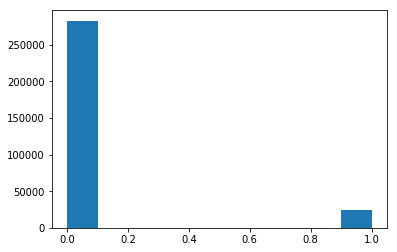

In [36]:
#visualising class imbalance in TARGET column
import matplotlib.pyplot as plt
plt.hist(Y_train)

In [37]:
#standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
#imputing missing values
from fancyimpute import IterativeImputer
ii=IterativeImputer(n_iter=1,random_state=0)
X_t=ii.fit_transform(X_train)
#X_test=ii.transform(X_test)
#converting label series to array
Y_t=Y_train.iloc[:].values

Using TensorFlow backend.


In [39]:
from keras.layers import Dense,BatchNormalization,Activation,Input
from keras.optimizers import Adam
from keras.models import Model
import keras.backend as K

In [40]:
#trying out various models using stratified kfold cross validation
n=X_train.shape[1]
nh1=500
nh2=200
nh3=50
X=Input(shape=(n,))
Y=Dense(nh1)(X)
Y=BatchNormalization()(Y)
Y=Activation('relu')(Y)
Y=Dense(nh2)(Y)
Y=BatchNormalization()(Y)
Y=Activation('relu')(Y)
Y=Dense(nh3)(Y)
Y=BatchNormalization()(Y)
Y=Activation('relu')(Y)
Y=Dense(1)(Y)
Y=Activation('sigmoid')(Y)
model=Model(X,Y)

Instructions for updating:
Colocations handled automatically by placer.


In [41]:
opt = Adam(lr=0.001,beta_1=0.9,beta_2=0.999,decay=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 334)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               167500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               100200    
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
__________

In [42]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3,random_state=1)
troc=[]
vroc=[]
for train_index, test_index in skf.split(X_t,Y_t):
    X_train, X_val = X_t[train_index], X_t[test_index]
    Y_train, Y_val = Y_t[train_index], Y_t[test_index]
    model.fit(X_train,Y_train, epochs=50, batch_size=64,validation_data=(X_val,Y_val))
    from sklearn.metrics import roc_auc_score
    Y_tp=model.predict(X_train)
    rosc=roc_auc_score(Y_train,Y_tp)
    troc.append(rosc)
    print('train auc: ',rosc)
    Y_vp=model.predict(X_val)
    rosc=roc_auc_score(Y_val,Y_vp)
    vroc.append(rosc)
    print('test auc :',rosc)

Instructions for updating:
Use tf.cast instead.
Train on 205007 samples, validate on 102504 samples
Epoch 1/50
205007/205007 [==============================] - 27s 131us/step - loss: 0.2810 - acc: 0.9075 - val_loss: 0.2516 - val_acc: 0.9193
Epoch 2/50
205007/205007 [==============================] - 25s 123us/step - loss: 0.2464 - acc: 0.9194 - val_loss: 0.2509 - val_acc: 0.9192
Epoch 3/50
205007/205007 [==============================] - 25s 124us/step - loss: 0.2440 - acc: 0.9194 - val_loss: 0.2509 - val_acc: 0.9192
Epoch 4/50
205007/205007 [==============================] - 25s 123us/step - loss: 0.2423 - acc: 0.9196 - val_loss: 0.2508 - val_acc: 0.9192
Epoch 5/50
205007/205007 [==============================] - 25s 122us/step - loss: 0.2413 - acc: 0.9196 - val_loss: 0.2509 - val_acc: 0.9192
Epoch 6/50
205007/205007 [==============================] - 25s 124us/step - loss: 0.2408 - acc: 0.9197 - val_loss: 0.2510 - val_acc: 0.9192
Epoch 7/50
205007/205007 [============================

Epoch 6/50
205007/205007 [==============================] - 28s 135us/step - loss: 0.2422 - acc: 0.9198 - val_loss: 0.2317 - val_acc: 0.9201
Epoch 7/50
205007/205007 [==============================] - 27s 133us/step - loss: 0.2418 - acc: 0.9197 - val_loss: 0.2321 - val_acc: 0.9200
Epoch 8/50
205007/205007 [==============================] - 27s 134us/step - loss: 0.2420 - acc: 0.9198 - val_loss: 0.2320 - val_acc: 0.9200
Epoch 9/50
205007/205007 [==============================] - 28s 135us/step - loss: 0.2417 - acc: 0.9196 - val_loss: 0.2333 - val_acc: 0.9198
Epoch 10/50
205007/205007 [==============================] - 27s 134us/step - loss: 0.2417 - acc: 0.9197 - val_loss: 0.2321 - val_acc: 0.9200
Epoch 11/50
205007/205007 [==============================] - 28s 134us/step - loss: 0.2415 - acc: 0.9196 - val_loss: 0.2328 - val_acc: 0.9199
Epoch 12/50
205007/205007 [==============================] - 27s 132us/step - loss: 0.2417 - acc: 0.9195 - val_loss: 0.2323 - val_acc: 0.9200
Epoch 13/5

Epoch 13/50
205008/205008 [==============================] - 25s 123us/step - loss: 0.2417 - acc: 0.9197 - val_loss: 0.2273 - val_acc: 0.9201
Epoch 14/50
205008/205008 [==============================] - 25s 123us/step - loss: 0.2417 - acc: 0.9197 - val_loss: 0.2276 - val_acc: 0.9201
Epoch 15/50
205008/205008 [==============================] - 25s 123us/step - loss: 0.2417 - acc: 0.9198 - val_loss: 0.2284 - val_acc: 0.9200
Epoch 16/50
205008/205008 [==============================] - 25s 122us/step - loss: 0.2415 - acc: 0.9197 - val_loss: 0.2276 - val_acc: 0.9201
Epoch 17/50
205008/205008 [==============================] - 25s 122us/step - loss: 0.2416 - acc: 0.9197 - val_loss: 0.2285 - val_acc: 0.9200
Epoch 18/50
205008/205008 [==============================] - 25s 123us/step - loss: 0.2415 - acc: 0.9196 - val_loss: 0.2272 - val_acc: 0.9202
Epoch 19/50
205008/205008 [==============================] - 25s 122us/step - loss: 0.2415 - acc: 0.9198 - val_loss: 0.2280 - val_acc: 0.9201
Epoch 

In [43]:
from statistics import mean
print('training auc: ',mean(troc))
print('validation auc: ',mean(vroc))

training auc:  0.7940296729191935
validation auc:  0.7860678115598853


In [44]:
test_df=test_df.merge(bur_g_skidc,how='left',on='SK_ID_CURR')
test_df=test_df.merge(bur_c_df,how='left',on='SK_ID_CURR')
X_test=test_df.drop(['SK_ID_CURR','TARGET'],axis=1)
X_test=sc.transform(X_test)
X_test=ii.transform(X_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [45]:
Y_pred=model.predict(X_test)
p_df=pd.DataFrame(Y_pred)
p_df.rename(columns={0:'TARGET'},inplace=True)
#p_df['target']=p_df['target'].astype(float)
output=pd.DataFrame({'SK_ID_CURR':test_df['SK_ID_CURR'],'TARGET':p_df['TARGET']})
#print(output)
output.to_csv('out.csv',index=False)

In [46]:
print(output)

       SK_ID_CURR    TARGET
0          100001  0.024414
1          100005  0.158554
2          100013  0.076006
3          100028  0.055747
4          100038  0.160550
5          100042  0.040098
6          100057  0.006039
7          100065  0.059073
8          100066  0.009403
9          100067  0.151362
10         100074  0.037870
11         100090  0.069991
12         100091  0.119217
13         100092  0.076144
14         100106  0.045627
15         100107  0.163253
16         100109  0.031420
17         100117  0.023534
18         100128  0.093865
19         100141  0.061936
20         100150  0.023259
21         100168  0.012357
22         100169  0.026715
23         100170  0.113082
24         100171  0.037346
25         100172  0.079677
26         100184  0.143461
27         100187  0.074477
28         100212  0.040995
29         100222  0.109844
...           ...       ...
48714      455963  0.020603
48715      455965  0.031359
48716      456007  0.366729
48717      456008  0